In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model #scikit learn library for machine learning in python


In [79]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


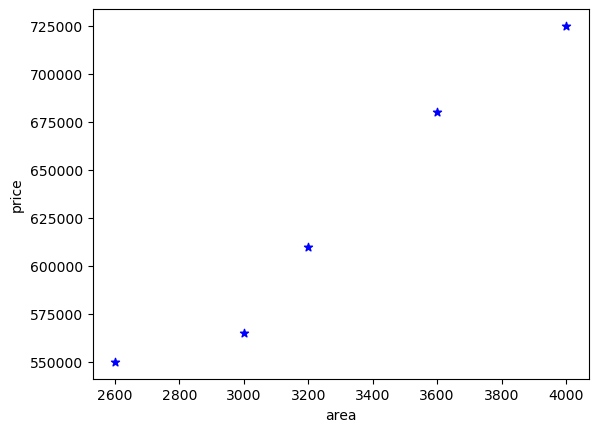

In [80]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='blue', marker='*',)

In [81]:
reg = linear_model.LinearRegression() # linear model is imported from sklearn
reg.fit(df[['area']],df.price)  #fitting the data means we are training the model using the data
# first argument is a 2d array, so supply a dataframe which only contains area, 2nd argument is the y axis in the plot i.e. price

LinearRegression()

### predict the price of home with area 3300

In [82]:
reg.predict([[3300]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [83]:
reg.coef_ # slope m in m*x +c

array([135.78767123])

In [84]:
reg.intercept_ # c in m*x +c

180616.43835616432

In [85]:
np.array(reg.predict(df[['area']]))

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [86]:
np.array(df.area)

array([2600, 3000, 3200, 3600, 4000])

### Let us draw a line with area on x axis and predicted price on y axis

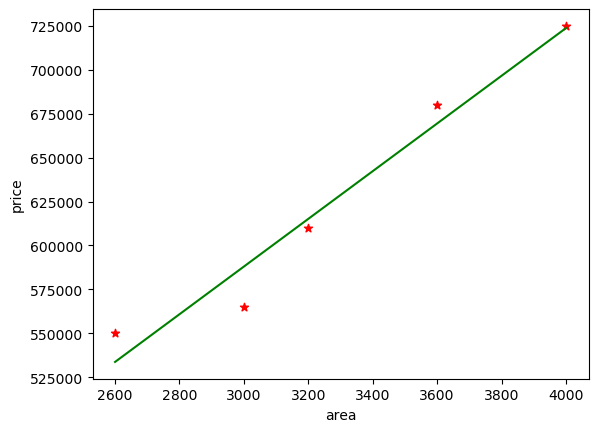

In [87]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='*',)
plt.plot(np.array(df.area), reg.predict(df[['area']]),color='green')

### save the model using pickle

In [88]:
import pickle

In [89]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)   #reg is the regression model

### now load the file

In [90]:
with open('model_pickle','rb') as f: #wb = write binary, rb =read binary
    mp = pickle.load(f)

In [91]:
mp.predict([[3300]])  # same answer as before bro

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

### When you have lot of numpy array you can use joblib instead of pickle

In [92]:
import joblib

In [93]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [94]:
mj = joblib.load('model_joblib')

In [95]:
mj.predict([[3300]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])